In [55]:
#Count the frequency of values in a given dataset
import collections

#Create a list of numbers with 1-4times, 2-4times, 3-2times, 4 ones, 5-2times
x = [1,1,1,1,2,2,2,2,3,3,4,5,5]
count_num = collections.Counter(x)
#help(collections.Counter)

count_num

Counter({1: 4, 2: 4, 3: 2, 4: 1, 5: 2})

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

outcomes = count_num.keys()
outcomes

dict_keys([1, 2, 3, 4, 5])

In [57]:
def P(x_i):
    frequency =count_num[x_i]
    length = len(x)
    return frequency/length

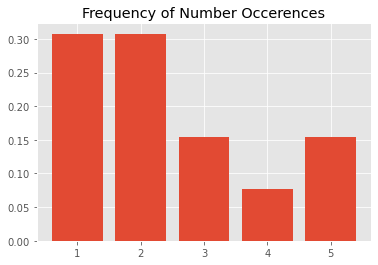

In [58]:
plt.bar(outcomes, [P(x_i) for x_i in outcomes]);
plt.title("Frequency of Number Occerences");

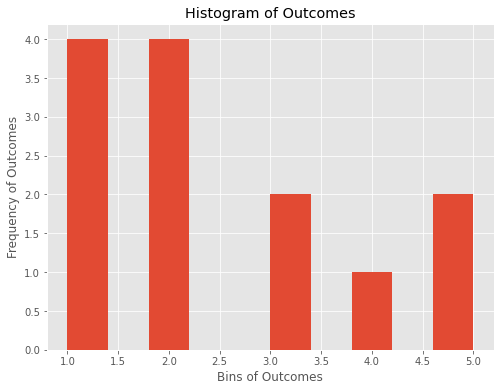

In [62]:
fig, ax = plt.subplots(figsize=(8,6))

plt.hist(x)
plt.title("Histogram of Outcomes")
plt.xlabel("Bins of Outcomes")
plt.ylabel("Frequency of Outcomes");

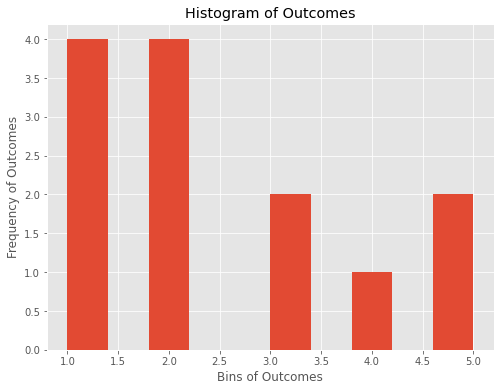

In [66]:
fig, ax = plt.subplots(figsize=(8,6))

ax.hist(x)
plt.title("Histogram of Outcomes")
#ax.title
ax.set_xlabel("Bins of Outcomes")
ax.set_ylabel("Frequency of Outcomes");

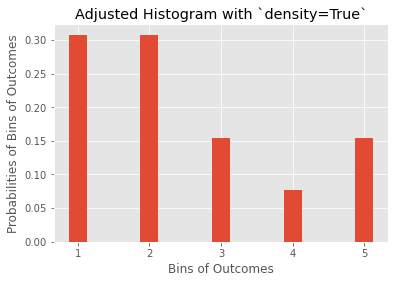

In [67]:
xtick_locations = range(1,6)
bins = np.arange(6)+0.5
plt.hist(x, bins=bins,  rwidth=0.25, density=True)
plt.xticks(ticks=xtick_locations)
plt.xlabel('Bins of Outcomes')
plt.ylabel('Probabilities of Bins of Outcomes')
plt.title("Adjusted Histogram with `density=True`");

In [63]:
#from scipy.stats import norm

In [30]:
#help(norm)

In [6]:
import pandas as pd
import numpy as np


In [7]:
df = pd.read_csv('titanic.csv', index_col=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
population_mean = df.Age.mean()
population_mean

29.69911764705882

In [19]:
#select a sample of 50 people
sample = df.sample(n=50, random_state=22)

#Calculate the sample mean
sample_mean = sample.Age.mean()
sample_mean

27.79268292682927

In [26]:
#find diff between sample and population mean
err = np.abs(sample_mean - population_mean)
err
#find percentage error by dividing the err with the population mean
per_err = err/population_mean
per_err

0.06419162827951391

In [29]:
five_point_est = []
for i in range(5):
    sample_i = df.sample(n=50, random_state= i+100)
    five_point_est.append(sample_i.Age.mean())
    #print(sample_i.Age).head(2)

five_point_est


[27.504146341463418,
 28.30263157894737,
 26.83783783783784,
 31.75,
 28.573170731707318]

In [32]:
#help(df.sample(random_state=22))
five_sample_errs = [np.abs(sample_mean-population_mean)/population_mean for
                    sample_mean in five_point_est]
five_sample_errs

[0.07390695345498845,
 0.047021129876892075,
 0.09634224973361595,
 0.06905532943145481,
 0.037911796866564734]

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
%matplotlib inline 

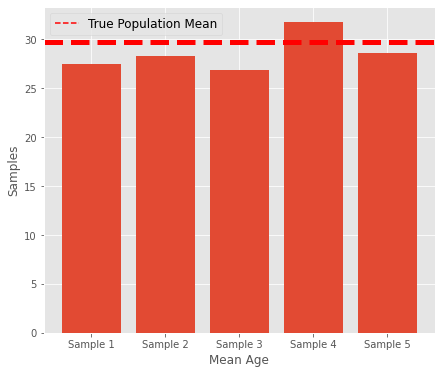

In [43]:
fig, ax = plt.subplots(figsize=(7,6))
x_labels = [f"Sample {x}" for x in range(1, 6)]

ax.bar(x=x_labels , height=five_point_est);
ax.set_ylabel("Samples");
ax.set_xlabel("Mean Age");
ax.axhline(y=population_mean, color='r', linewidth=5, linestyle="--");
ax.legend(
    handles=[Line2D([0],[0], color="red", linestyle="--")],
    labels=["True Population Mean"],
    fontsize="large");



In [44]:
sample_means = []
for i in range(10**4):
    sample = df.sample(n=50, random_state=i)
    sample_means.append(sample.Age.mean())
    
len(sample_means)

10000

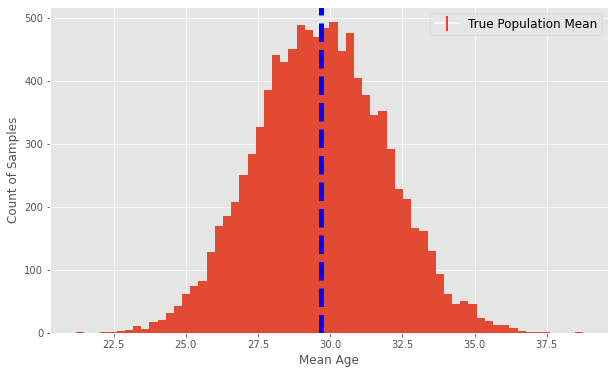

In [49]:
fig, ax = plt.subplots(figsize=(10,6))

ax.hist(sample_means, bins="auto")
ax.set_xlabel("Mean Age")
ax.set_ylabel("Count of Samples")
ax.axvline(x=population_mean, color="blue", linewidth=5, linestyle="--")
ax.legend(
    handles=[Line2D(
        [0],[0],
        color="white",
        marker="|",
        markersize=15,
        markeredgewidth=1.5,
        markeredgecolor="red"
    )],
    labels=["True Population Mean"],
    fontsize="large"
);

In [50]:
ten_thousand_samples_mean = np.mean(sample_means)
ten_thousand_samples_mean

29.678139189972246

In [51]:
population_mean

29.69911764705882

In [52]:
err = np.abs(ten_thousand_samples_mean - population_mean) / population_mean
accuracy = 1 - err
accuracy

0.9992936336582157